In [9]:
import numpy as np
from tqdm import *
from collections import defaultdict
import nltk

en_data = open('/data/xuwenshen/ai_challenge/data/train/train/train.en', encoding='utf-8').readlines()


enl = defaultdict(lambda : 0)

en_tokens = []

for i in tqdm(range(len(en_data))):
    tokens = nltk.word_tokenize(en_data[i])
    en_tokens.append(tokens)
    enl[len(tokens)] += 1
    

    

100%|██████████| 9903244/9903244 [24:58<00:00, 6607.16it/s]


In [14]:
import json

train_en = open('/data/xuwenshen/ai_challenge/data/train/train/en_tokes.json', 'w')

json.dump(en_tokens, train_en)

train_en.close()


In [1]:
import json
import numpy as np
from tqdm import *
from collections import defaultdict
import nltk


en_tokes = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/en_tokes.json'))

enl = defaultdict(lambda : 0)
for i in range(len(en_tokes)):
    enl[len(en_tokes[i])] += 1


enl = dict(enl)

enx = []
eny = []
for item in enl.items():
    enx.append(item[0])
    eny.append(item[1])
    

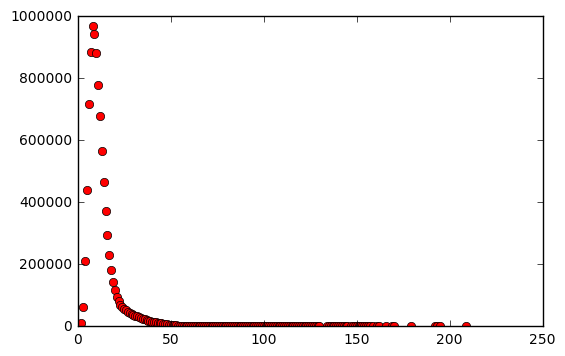

In [2]:
import matplotlib.pyplot as plt
plt.plot(enx, eny, 'ro')
plt.show()

In [10]:
# for i in range(len(eny)):
#     print (i, eny[i])

print (sum(eny[:50]) / len(en_tokes))
print (eny[0])

0.9969247450633348
1


In [11]:
import numpy as np
from tqdm import *
from collections import defaultdict

zh_data = open('/data/xuwenshen/ai_challenge/data/train/train/train.zh', encoding='utf-8').readlines()
zh_tokens = []

zhl = defaultdict(lambda : 0)

for i in tqdm(range(len(zh_data))):
    zhl[len(zh_data[i].rstrip('\n'))] += 1
    zh_tokens.append(list(zh_data[i].rstrip('\n')))


100%|██████████| 9903244/9903244 [00:41<00:00, 239901.32it/s]


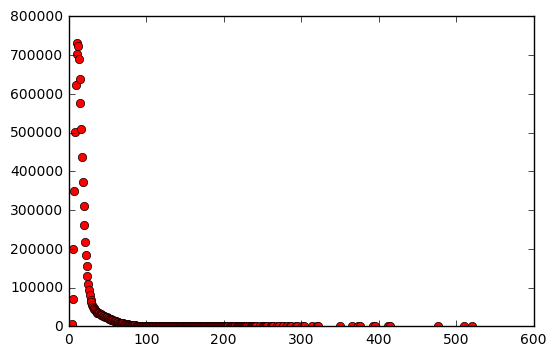

In [12]:
import matplotlib.pyplot as plt
zhl = dict(zhl)

zhx = []
zhy = []
for item in zhl.items():
    zhx.append(item[0])
    zhy.append(item[1])


plt.plot(zhx, zhy, 'ro')
plt.show()

In [18]:
# for i in range(len(zhy)):
#     print (i, zhy[i])

print (sum(zhy[:60])/ len(zh_data))
print (zhy[0])

0.9781537241736142
3


In [20]:
from tqdm import *

en_keep = []
zh_keep = []

for i in tqdm(range(len(en_tokes))):
    if len(en_tokes[i]) > 50 or len(en_tokes[i]) == 0:
        continue
        
    if len(zh_tokens[i]) > 60 or len(zh_tokens[i]) == 0:
        continue
        
    en_keep.append(en_tokes[i])
    zh_keep.append(zh_tokens[i])
    
print (len(en_keep))
print (len(zh_keep))
print (len(en_keep)/len(en_tokes))

100%|██████████| 9903244/9903244 [00:10<00:00, 984172.78it/s]

9698532
9698532
0.9793287936760924


In [21]:
import json

_ = open('/data/xuwenshen/ai_challenge/data/train/train/en_data-50-60.json', 'w')
json.dump(en_keep, _)
_.close()

_ = open('/data/xuwenshen/ai_challenge/data/train/train/zh_data-50-60.json', 'w')
json.dump(zh_keep, _)
_.close()

In [7]:
from collections import defaultdict

zh_pfc = defaultdict(lambda : 0)
en_pfc = defaultdict(lambda : 0)

for i in tqdm(range(len(en_keep))):
    for j in range(len(en_keep[i])):
        en_pfc[en_keep[i][j].lower()] += 1
    for j in range(len(zh_keep[i])):
        zh_pfc[zh_keep[i][j]] += 1

100%|██████████| 9894344/9894344 [01:55<00:00, 85675.15it/s]


In [8]:
zh_pfc = dict(zh_pfc)
en_pfc = dict(en_pfc)

print (len(zh_pfc))
print (len(en_pfc))

zh_voc = sorted(zh_pfc.items(), key=lambda x: x[1], reverse=True)
en_voc = sorted(en_pfc.items(), key=lambda x: x[1], reverse=True)



8723
591905


In [9]:
import json

zh_ = open('/data/xuwenshen/ai_challenge/data/train/train/zh_.json', 'w')
json.dump(zh_voc, zh_)
zh_.close()

en_ = open('/data/xuwenshen/ai_challenge/data/train/train/en_.json', 'w')
json.dump(en_voc, en_)
en_.close()

100%|██████████| 4000/4000 [00:02<00:00, 1635.43it/s]


0.999267885281


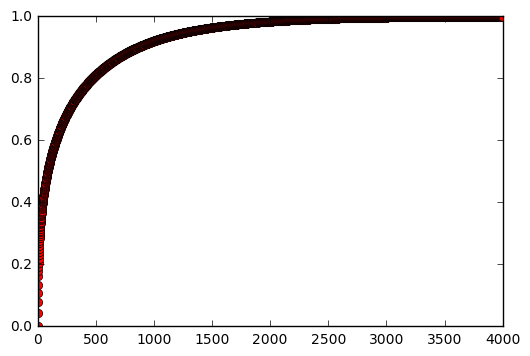

In [10]:
import matplotlib.pyplot as plt
import numpy as np

zh_voc = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/zh_.json'))

prob = []

counlst = list(map(int, np.array(zh_voc)[:,1]))
n2 = sum(counlst)

for i in tqdm(range(4000)):
    n1 = sum(np.array(counlst)[:i])
    prob.append(n1/n2)
plt.plot(range(0, 4000),prob , 'ro')
print (prob[-1])
plt.show()


In [11]:
import json
import numpy as np

zh_voc = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/zh_.json'))

zh = list(np.array(zh_voc)[:4000, 0])

zh.append('eos#')
zh.append('go#')
zh.append('pad#')
zh.append('nuk#')

ids = [i for i in range(len(zh))]
zhvoc = dict(zip(zh, ids))
# rzhvoc = dict(zip(zhvoc.values(), zhvoc.keys())) 

zh_ = open('/data/xuwenshen/ai_challenge/data/train/train/zh_voc.json', 'w')
json.dump(zhvoc, zh_)
zh_.close()

# zh_ = open('/data/xuwenshen/ai_challenge/data/train/train/zh_rvoc.json', 'w')
# json.dump(rzhvoc, zh_)
# zh_.close()


100%|██████████| 50000/50000 [03:36<00:00, 230.83it/s]


0.985363204237


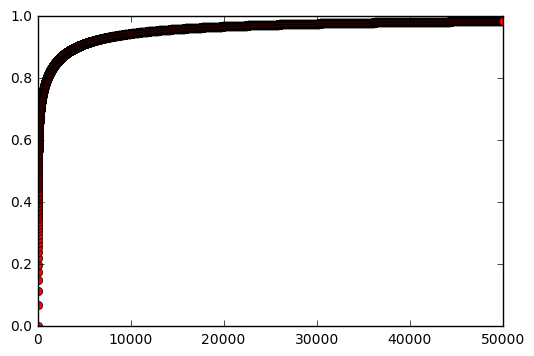

In [12]:
import matplotlib.pyplot as plt

prob = []

counlst = list(map(int, np.array(en_voc)[:,1]))
n2 = sum(counlst)
counlst = counlst[:50000]

for i in tqdm(range(50000)):
    n1 = sum(np.array(counlst)[:i])
    prob.append(n1/n2)
plt.plot(range(0, 50000),prob , 'ro')
print (prob[-1])
plt.show()


In [13]:
import json

en_voc = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/en_.json'))
en = list(np.array(en_voc)[:50000, 0])

en.append('eos#')
en.append('go#')
en.append('pad#')
en.append('nuk#')

ids = [i for i in range(len(en))]
envoc = dict(zip(en, ids))

en_ = open('/data/xuwenshen/ai_challenge/data/train/train/en_voc.json', 'w')
json.dump(envoc, en_)
en_.close()



In [6]:
import h5py
import json
from collections import defaultdict

zh_voc = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/zh_voc.json'))

h5 = h5py.File('/data/xuwenshen/ai_challenge/data/valid/valid/valid.h5py', 'r')

rvoc = defaultdict()
for (k,v) in zh_voc.items():
    rvoc[v] = k
rvoc = dict(rvoc)

f1 = h5['ground_truth']
f2 = h5['label']
for i in range(100):
    text1 = ''
    text2 = ''
    for j in range(101):
        if f1[i][j] != zh_voc['pad#']: 
            text1 += rvoc[f1[i][j]]
    for j in range(101):
        if f2[i][j] != zh_voc['pad#']:
            text2 += rvoc[f2[i][j]]
    
    
    print (i, text1)
    print (i, text2)
    

0 go#哦，你瞧当魔术师的乐趣，仅次于行骗高手。eos#
0 哦，你瞧当魔术师的乐趣，仅次于行骗高手。eos#
1 go#好几天我爸都挺难熬的。eos#
1 好几天我爸都挺难熬的。eos#
2 go#带有凹口拱顶、着色条带和加固板的书桌；预钻孔用于要求的电源集线器。eos#
2 带有凹口拱顶、着色条带和加固板的书桌；预钻孔用于要求的电源集线器。eos#
3 go#好吧，那我告诉你，我要给你买双鞋eos#
3 好吧，那我告诉你，我要给你买双鞋eos#
4 go#拇指占了手指功能的四成，可不能没它。eos#
4 拇指占了手指功能的四成，可不能没它。eos#
5 go#我来问问你。现在的股市行情非常不景气。eos#
5 我来问问你。现在的股市行情非常不景气。eos#
6 go#所以汤米创立了"战区"。eos#
6 所以汤米创立了"战区"。eos#
7 go#今天早上，他拿了把上了膛的枪对着头。我制止了他。eos#
7 今天早上，他拿了把上了膛的枪对着头。我制止了他。eos#
8 go#不过，黎明一到我们就会变成南瓜吧？eos#
8 不过，黎明一到我们就会变成南瓜吧？eos#
9 go#所以我只能用我过去想事情的方法去思考。eos#
9 所以我只能用我过去想事情的方法去思考。eos#
10 go#是什么风把您给吹来了呀？eos#
10 是什么风把您给吹来了呀？eos#
11 go#如果你认为能在电话线的另一端找到爱情，就打吧。eos#
11 如果你认为能在电话线的另一端找到爱情，就打吧。eos#
12 go#很高兴你能回来继续玩。eos#
12 很高兴你能回来继续玩。eos#
13 go#是一种活性非常强的药物。你的意思是说药物反应？eos#
13 是一种活性非常强的药物。你的意思是说药物反应？eos#
14 go#希望你们能解决矛盾，如果不行而你需要找人倾诉，eos#
14 希望你们能解决矛盾，如果不行而你需要找人倾诉，eos#
15 go#别傻了，快过来坐。我们有拖鞋！eos#
15 别傻了，快过来坐。我们有拖鞋！eos#
16 go#哦，可以…… 这么说？眼睛里写着呢。eos#
16 哦，可以…… 这么说？眼睛里写着呢。eos#
17 go#两次都成功清除了癌细胞，但是两次都复发了。eos#
17 两次都成功清除了癌细胞，但是两次都复发了。eos#
18 go#你们

In [3]:
import h5py
import json
from collections import defaultdict

en_voc = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/en_voc.json'))

h5 = h5py.File('/data/xuwenshen/ai_challenge/data/valid/valid/valid.h5py', 'r')

rvoc = defaultdict()
for (k,v) in en_voc.items():
    rvoc[v] = k
rvoc = dict(rvoc)
print (rvoc[0])

f1 = h5['en_len']
f2 = h5['en']
for i in range(100):
    text = ''
    
    for j in range(len(f2[i])):
        text += ' ' + rvoc[f2[i][j]]
    print (i, text)
    

.
0  oh , you know , being a magician , it 's the next best thing to being a con artist . pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad#
1  my father has had a particularly rough couple of days . pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad#
2  nuk# desk with a notched arch top and painted banding ; nuk# for required power hub . pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad# pad#
3  yes , i 'm telling you , i 'm gon na buy you a pair of shoes pad# pad# pad# pad# pad# pad# pad# pad# pad

In [8]:
# 将en和zh都dump到同一个h5py文件，train.h5py,valid.h5py
import json
import h5py



from collections import defaultdict
from tqdm import *
import random

_en = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/en_data.json'))
en_voc = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/en_voc.json'))

_zh = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/zh_data.json'))
zh_voc = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/zh_voc.json'))

print (len(_en))
print (len(_zh))

en_zh = []

for i in tqdm(range(len(_en))):
    if len(_en[i]) == 0 or len(_en[i]) > 60:
        print ('en ', len(_en[i]))
        continue
    if len(_zh[i]) == 0 or len(_zh[i]) > 100:
        print ('zh ', len(_zh[i]))
        continue
    
    en_zh.append([_en[i], _zh[i]])

# train data shuffle, valid data no 
random.shuffle(en_zh)
    
f = h5py.File("/data/xuwenshen/ai_challenge/data/train/train/train.h5py", "a")


en_set = f.create_dataset("en", (len(en_zh), 60), dtype='i8')
en_length_set = f.create_dataset('en_len', (len(en_zh), ), dtype='i8')

label_set = f.create_dataset("label", (len(en_zh), 101), dtype='i8')
zh_length_set = f.create_dataset('zh_len', (len(en_zh), ), dtype='i8')
gtruth_set = f.create_dataset('ground_truth', (len(en_zh), 101), dtype='i8')

en = []
en_len = []
labels = []
zh_len = []
gtruths = []

for i in tqdm(range(len(en_zh))):
    
    #en data
    tmp = [en_voc['pad#'] for j in range(60)]
    
    for j in range(len(en_zh[i][0])):
        if en_zh[i][0][j].lower() not in en_voc:
            tmp[j] = en_voc['nuk#']
        else:
            tmp[j] = en_voc[en_zh[i][0][j].lower()]
    en.append(tmp)
    en_len.append(len(en_zh[i][0]))
    
    
    # zh data
    tlabel = [zh_voc['pad#'] for j in range(101)]
    tgtruth = [zh_voc['pad#'] for j in range(102)]
    for j in range(len(en_zh[i][1])):
        if en_zh[i][1][j] not in zh_voc:
            tlabel[j] = zh_voc['nuk#']
            tgtruth[j+1] = zh_voc['nuk#']
        else:
            tlabel[j] = zh_voc[en_zh[i][1][j]]
            tgtruth[j+1] = zh_voc[en_zh[i][1][j]]
            
    tlabel[len(en_zh[i][1])] = zh_voc['eos#']
    tgtruth[0] = zh_voc['go#']
    tgtruth[-1] = zh_voc['eos#']
    
    labels.append(tlabel)
    gtruths.append(tgtruth)
    zh_len.append(len(en_zh[i][1])+1)    
    
    if len(en) == 256:
        start = i+1-256
        end = i+1
        # en data
        en_set[start : end] = en
        en_length_set[start : end] = en_len
        en = []
        en_len = []
        
        #zh data
        label_set[start : end] = labels
        zh_length_set[start : end] = zh_len
        gtruth_set[start : end] = gtruths        
        labels = []
        zh_len = []
        gtruths = []

        
end = len(en_zh)
start = end-len(en)
print (start, end)
en_set[start : end] = en
en_length_set[start : end] = en_len

label_set[start : end] = labels
zh_length_set[start : end] = zh_len
gtruth_set[start : end] = gtruths
f.close()

  0%|          | 44138/9894344 [00:00<00:22, 441257.33it/s]

9894344
9894344


100%|██████████| 9894344/9894344 [13:25<00:00, 12291.04it/s]

9894144 9894344


In [2]:
# 解析valid en.sgm 和 test en.sgm
import json
import xml
import re
import nltk


fin = open('/data/xuwenshen/ai_challenge/data/test/test.sgm').readlines()

start = re.compile(r'\d+\"> ')
end = re.compile(r' </seg>')

en = []
for i in range(len(fin)):
    
    lst = start.split(fin[i])
    if len(lst) != 2:
        print (fin[i])
        continue
    
    lst = end.split(lst[-1])
    
    if len(lst) != 2:
        print (fin[i])
        continue
    
    en.append(lst[0])
    
en_tokens = []
lens = []
for i in range(len(en)):
    tokens = nltk.word_tokenize(en[i])
    en_tokens.append(tokens)
    lens.append(len(tokens))
    
fout = open('/data/xuwenshen/ai_challenge/data/test/en_b.json', 'w')

json.dump(en_tokens, fout)

fout.close()
print (max(lens))
print (min(lens))

<?xml version="1.0" encoding="UTF-8"?>

<mteval>

<srcset setid="setid" srclang="en" trglang="zh">

<doc sysid="sysid" docid="docid" genre="talk">

</doc>

</srcset>

</mteval>

28
6


In [5]:
# 解析valid zh.sgm
import json
import xml
import re
import nltk


fin = open('/data/xuwenshen/ai_challenge/data/valid/valid/valid.en-zh.zh.sgm').readlines()

start = re.compile(r'\d+\"> ')
end = re.compile(r' </seg>')

zh = []
for i in range(len(fin)):
    
    lst = start.split(fin[i])
    if len(lst) != 2:
        print (fin[i])
        continue
    
    lst = end.split(lst[-1])
    
    if len(lst) != 2:
        print (fin[i])
        continue
    
    zh.append(lst[0])

    
    
zh_tokens = []
lens = []
for i in range(len(zh)):
    tokens = list(zh[i])
    zh_tokens.append(tokens)
    lens.append(len(tokens))
    
fout = open('/data/xuwenshen/ai_challenge/data/valid/valid/zh.json', 'w')

json.dump(zh_tokens, fout)

fout.close()
print (max(lens))
print (min(lens))

<?xml version="1.0" encoding="UTF-8"?>

<mteval>

<refset setid="setid" srclang="en" trglang="zh" refid="ref0">

<doc sysid="sysid" docid="docid" genre="talk">

</doc>

</refset>

</mteval>

59
5


In [26]:
# dump test
import json
import h5py
from collections import defaultdict
from tqdm import *

_en = json.load(open('/data/xuwenshen/ai_challenge/data/test/en.json'))
en_voc = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/en_voc.json'))

print (len(_en))

f = h5py.File("/data/xuwenshen/ai_challenge/data/test/test.h5py", "a")

en_set = f.create_dataset("en", (len(_en), 60), dtype='i8')
en_length_set = f.create_dataset('en_len', (len(_en), ), dtype='i8')


en = []
en_len = []

for i in tqdm(range(len(_en))):
    
    #en data
    tmp = [en_voc['pad#'] for j in range(60)]
    if len(_en[i]) == 0 or len(_en[i]) > 60:
        print ('en ', len(_en[i]))
        _en[i] = _en[i][:min(60, len(_en[i]))]
    
    for j in range(len(_en[i])):
        if _en[i][j].lower() not in en_voc:
            tmp[j] = en_voc['nuk#']
        else:
            tmp[j] = en_voc[_en[i][j].lower()]
    en.append(tmp)
    en_len.append(len(_en[i]))
    
    
       
    if len(en) == 256:
        start = i+1-256
        end = i+1
        # en data
        en_set[start : end] = en
        en_length_set[start : end] = en_len
        en = []
        en_len = []

        
end = len(_en)
start = end-len(en)
print (start, end)
en_set[start : end] = en
en_length_set[start : end] = en_len

f.close()

 29%|██▉       | 2304/8000 [00:00<00:00, 22890.11it/s]

8000


100%|██████████| 8000/8000 [00:00<00:00, 31513.31it/s]

7936 8000


In [5]:
import h5py
import json
from collections import defaultdict

en_voc = json.load(open('/data/xuwenshen/ai_challenge/data/train/train/en_voc.json'))

h5 = h5py.File('/data/xuwenshen/ai_challenge/data/valid/valid/valid.h5py', 'r')

rvoc = defaultdict()
for (k,v) in en_voc.items():
    rvoc[v] = k
rvoc = dict(rvoc)

f1 = h5['en_len']
f2 = h5['en']
for i in range(100):
    text = ''
    for j in range(len(f2[i])):
        if rvoc[f2[i][j]] == 'pad#': continue
        text += ' ' + rvoc[f2[i][j]]
    print (i, text)
    

0  do you think we look young enough to blend in at a high school ?
1  hi , honey . i guess you 're really tied up in meetings .
2  because you want to start a family before you hit the nursing home .
3  she 's got to have me in her sight like 24 hours a day .
4  find a safety chain or something to keep these lights in place .
5  so that no parent has to go through what i 've known .
6  i have to go to the date , learn to dance . definitely . now .
7  is when someone we 've trusted makes the choice for us .
8  okay . well , i guess there 's not much to do about it right now then .
9  i respect that , and i will protect it at all cost .
10  yeah , it 's getting weird . - let 's get out of here .
11  so after investigators got a blood trace on the doorknob ,
12  which means if we do n't find her , she 's only got two weeks to live .
13  but , still , i 'm starting to think it would be smart
14  if you want to remain team manager , you have to do this .
15  okay ? you wing your ass down h